# Lung Cancer Prediction

Problem Statement: What Causes Lung Cancer and how should it be treated 

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier
4.Logistic Regression


In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [135]:
df = pd.read_excel('cancer_patient_data_sets.xlsx')

In [136]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [137]:
df=df.drop('Patient Id' , axis =1)

In [138]:
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [139]:
df.groupby('Level').describe()

Age                                                     Gender  \
        count       mean        std   min   25%   50%   75%   max  count   
Level                                                                      
High    365.0  37.320548  10.724253  18.0  29.0  36.0  44.0  64.0  365.0   
Low     303.0  35.412541  12.126736  17.0  25.0  33.0  44.0  62.0  303.0   
Medium  332.0  38.620482  13.015234  14.0  32.0  38.0  46.0  73.0  332.0   

                  ... Dry Cough      Snoring                                \
            mean  ...       75%  max   count      mean       std  min  25%   
Level             ...                                                        
High    1.309589  ...       7.0  7.0   365.0  3.227397  1.493692  1.0  2.0   
Low     1.508251  ...       4.0  6.0   303.0  2.141914  1.027596  1.0  1.0   
Medium  1.406627  ...       5.0  7.0   332.0  3.310241  1.528229  1.0  2.0   

                       
        50%  75%  max  
Level                  
High    3.0  4.0  7.0  
Low     2.0  3.0  4.0  
Medium  3.0  5.0  6.0  

[3 rows x 184 columns]

In [140]:
df['Level'].value_counts()


Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [141]:
df['Gender'].value_counts()

Gender
1    598
2    402
Name: count, dtype: int64

In [142]:

df['Level'] = df['Level'].replace({'High': 2, 'Medium': 1, 'Low': 0})




In [143]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [144]:
df.Level

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

In [145]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [146]:
corrmat= df.corr

In [147]:
corrmat

<bound method DataFrame.corr of      Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2  

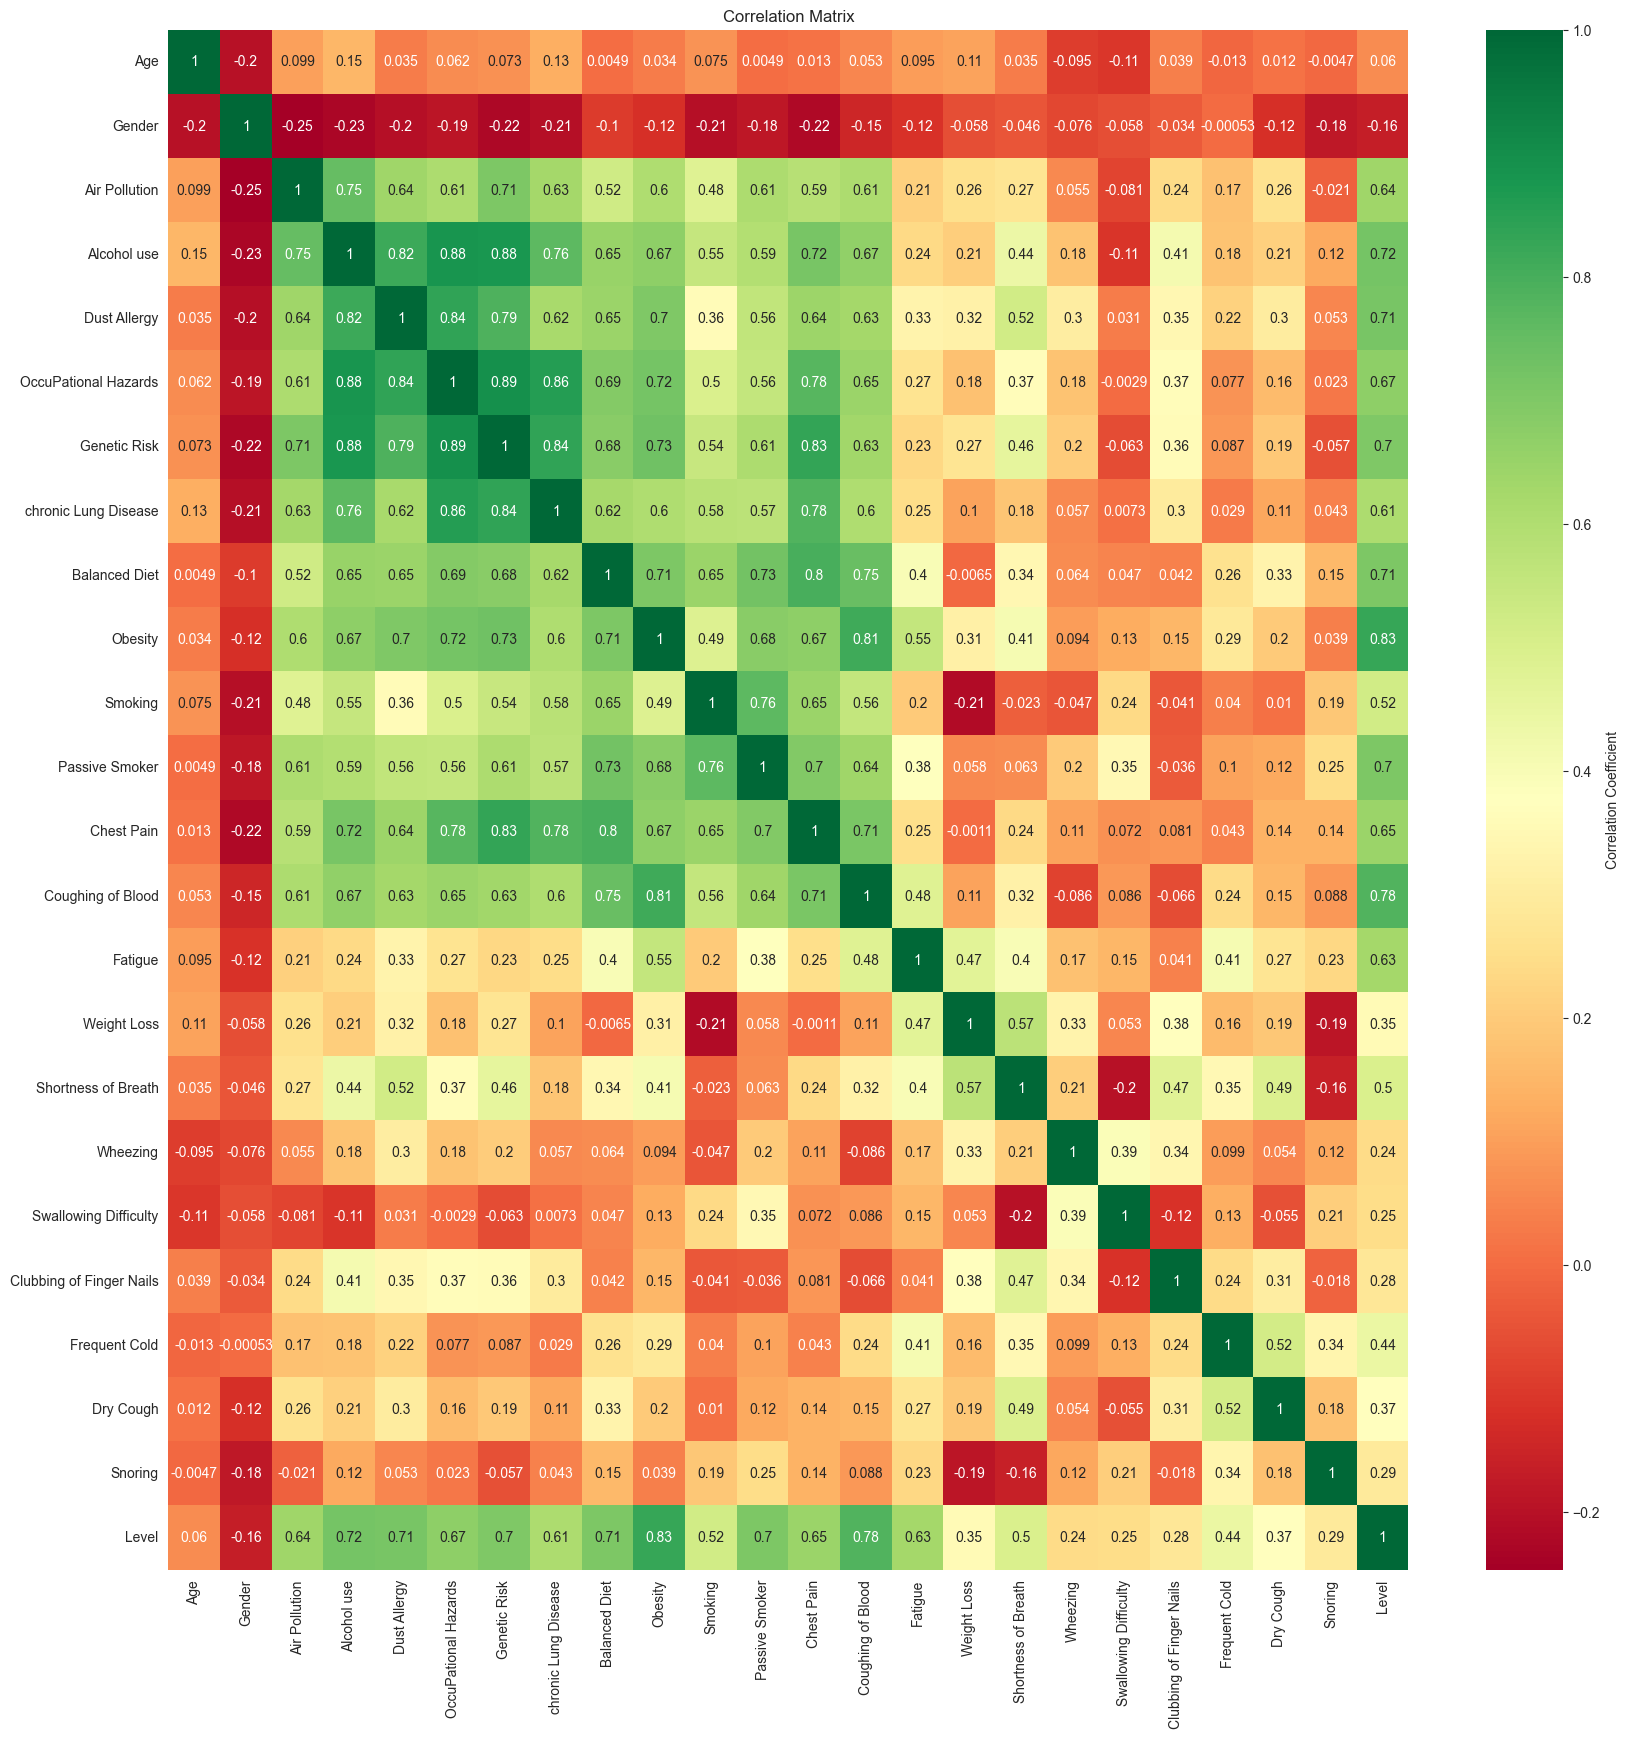

In [148]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn"
            ,cbar_kws={'label':'Correlation Coefficient'})

plt.title('Correlation Matrix')
plt.savefig('correlation.png')

Correlation of each column with Level:

Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Age                         0.060048
Gender                     -0.164985
Name: Level_num, dtype: float64


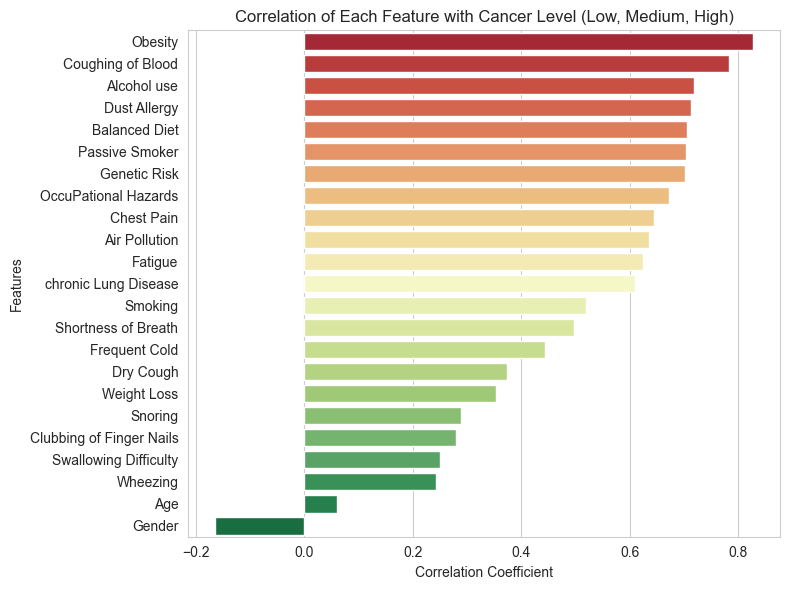

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("cancer_patient_data_sets.xlsx")

# Map Level to numeric values for correlation
df['Level_num'] = df['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Compute correlation with target column "Level_num"
corr_with_level = df.corr(numeric_only=True)['Level_num'].drop('Level_num').sort_values(ascending=False)

# Print correlations
print("Correlation of each column with Level:\n")
print(corr_with_level)

# Plot correlations as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_level.values, y=corr_with_level.index, palette="RdYlGn")
plt.title("Correlation of Each Feature with Cancer Level (Low, Medium, High)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


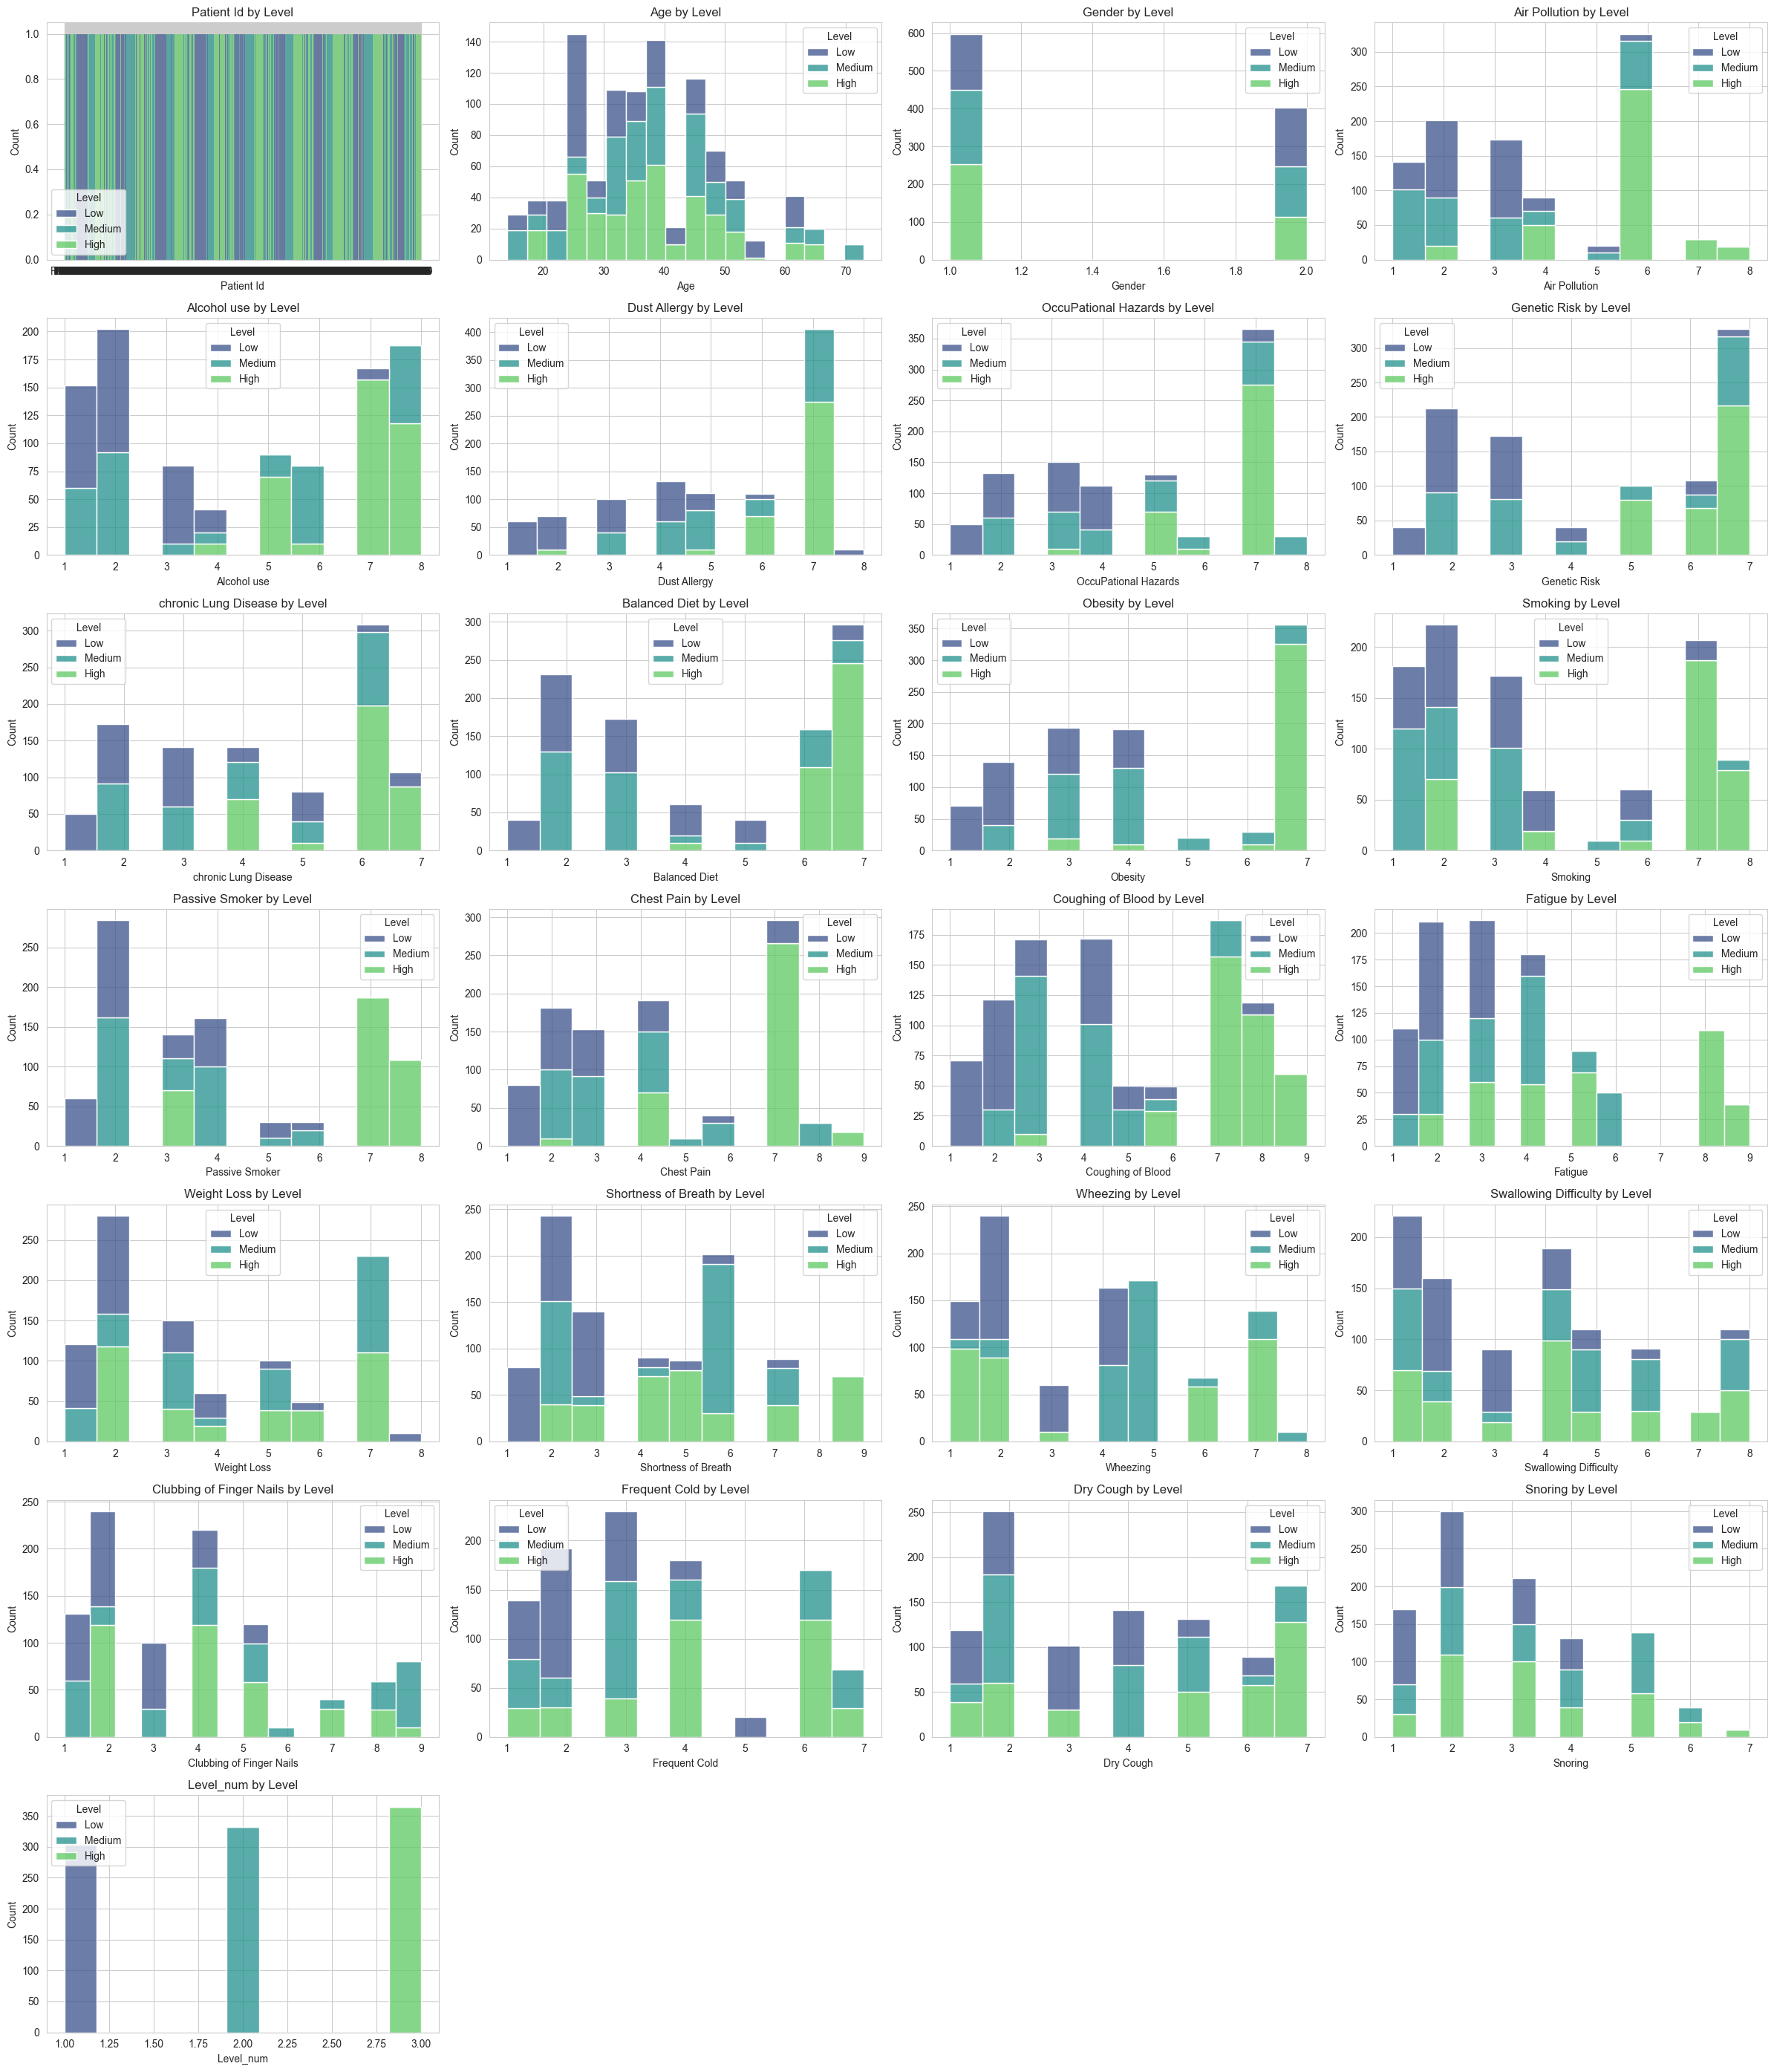

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric or unrelated columns if needed
features = df.columns.drop('Level')  # Assuming 'Level' is the target
num_cols = 4
num_rows = -(-len(features) // num_cols)  

plt.figure(figsize=(24, num_rows * 4))

for i, col in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df, x=col, hue='Level', multiple='stack', palette='viridis')
    plt.title(f'{col} by Level')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Plotted a Histogram where levels(low,medium,high) with each feature 
and count at the Y axis

<Axes: xlabel='Level', ylabel='count'>

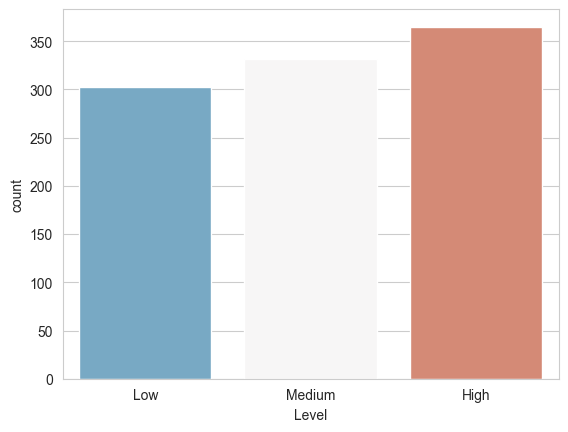

In [151]:
sns.set_style('whitegrid')
sns.countplot(x='Level' , data=df, palette='RdBu_r')

Importing train test split to separate the training data and the test data 


Importing train test split and using 70% for training and 30% for testing


In [152]:

X= df.drop(['Level'], axis=1)
y= df['Level']





Importing train test Split where 30% data is for testing and 70% for training

In [153]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [154]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Level_num
0,P1,33,1,2,4,5,4,3,2,2,...,4,2,2,3,1,2,3,4,Low,1
1,P10,17,1,3,1,5,3,4,2,2,...,3,7,8,6,2,1,7,2,Medium,2
2,P100,35,1,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,3
3,P1000,37,1,7,7,7,7,6,7,7,...,2,3,1,4,5,6,7,5,High,3
4,P101,46,1,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,High,3


In [155]:
print(X_train.dtypes)


Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level_num                    int64
dtype: object


In [156]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Level_num
0,P1,33,1,2,4,5,4,3,2,2,...,4,2,2,3,1,2,3,4,Low,1
1,P10,17,1,3,1,5,3,4,2,2,...,3,7,8,6,2,1,7,2,Medium,2
2,P100,35,1,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,3
3,P1000,37,1,7,7,7,7,6,7,7,...,2,3,1,4,5,6,7,5,High,3
4,P101,46,1,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,High,3


In [161]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Level_num
0,33,1,2,4,5,4,3,2,2,4,...,4,2,2,3,1,2,3,4,Low,1
1,17,1,3,1,5,3,4,2,2,2,...,3,7,8,6,2,1,7,2,Medium,2
2,35,1,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,High,3
3,37,1,7,7,7,7,6,7,7,7,...,2,3,1,4,5,6,7,5,High,3
4,46,1,6,8,7,7,7,6,7,7,...,2,4,1,4,2,4,2,3,High,3


In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_prepared = scaler.fit_transform(X_train)
X_test_prepared = scaler.fit(X_test)

ValueError: could not convert string to float: 'P586'

In [163]:
X.shape

(1000, 25)

In [164]:
y.shape

(1000,)

In [165]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [166]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check the shape of X_test and y_test
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (700, 25)
Shape of y_train: (700,)
Shape of X_test: (300, 25)
Shape of y_test: (300,)


I have implemented few Machine Learning Models to check which gives highest Score 

In [167]:


plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.set_palette('Set2')


<Figure size 1000x600 with 0 Axes>

In [168]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    
     
}

# === Model evaluation ===
results = []

for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-score': f1,
        'Recall': recall,
        'Precision': precision
    })

# === Final results as DataFrame sorted by Accuracy ===
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

Training: Logistic Regression


ValueError: could not convert string to float: 'P586'

PLOTTING FOR CONFUSION MATRIX FOR EACH ALGORITHM

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix for each model
for name, model in models.items():
    print(f"\nConfusion Matrix: {name}")
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Store cross-validation scores for each k
knn_scores = []

# Try k values from 1 to 30
for k in range(1, 31):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X, y, cv=3)
    knn_scores.append(scores.mean())

# Find the best k
best_k = knn_scores.index(max(knn_scores)) + 1  # +1 because range starts at 1

print(f"Best k: {best_k}")
print(f"Best cross-validation score: {max(knn_scores):.4f}")

# Optional: Plotting k vs CV accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), knn_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN: Number of Neighbors vs Accuracy')
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()


By performing Cross Validation It has given n_neighbours value which I have used in the above Code


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


y= df['Level']
X= df.drop(['Level'], axis=1)

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# 4. Predict on test set here test (Levels)
y_pred = knn.predict(X_test)

# EVALUATION 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'macro' works for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optional: detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:

plt.figure(figsize=(12, 6)) 

# Plot the KNN scores
plt.plot(range(1, 31), knn_scores, color='red', marker='o', linestyle='-')

# taking 5 points to reduce clutter 
top_k = sorted(enumerate(knn_scores, start=1), key=lambda x: x[1], reverse=True)[:5]
for k, score in top_k:
    plt.text(k, score + 0.001, f'({k}, {score:.3f})', ha='center', fontsize=9, color='blue')


plt.xticks(range(1, 31))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.title('K Neighbour Classifier Scores for Different K Values')
plt.grid(True)
plt.tight_layout()
plt.show()


Decision Tree classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()  # No n_estimators here
score = cross_val_score(decision_tree_classifier, X, y, cv=5)
print("Cross-validation score:", score.mean())


In [ ]:
score.mean()

By using this dataset ,
By plotting the correlation matrix 
I could notice that the main cause of Lung Cancer is becoz of Caughing of Blood and Obesity